# Bolsa de palabras con texto libreto Titanic

In [69]:
import pandas as pd
import numpy as np
import re 
from wordcloud import WordCloud, ImageColorGenerator

from nltk.corpus import stopwords
stopwords = stopwords.words("spanish")

import matplotlib.pyplot as plt
import PIL.Image
from IPython.display import display

In [73]:
data = open("130816576-TITANIC-Libreto.txt", "r", encoding="UTF-8")
print(data.read())

Narradora (Rose ): Ha sido hace 84 años … Oyente: solo tienes que decirnos lo que puedas. Narradora (Rose ): Ha sido 84 años y todavía puedo oler la pintura fresca (suspira). La vajilla no había sido usada; nadie había dormido en las sabanas; el Titanic era llamado el barco de los sueño, y lo era; en verdad lo era. Las clases eran separadas y yo por su puesto me encontraba en la más alta, junto a mi prometido Cal; pero yo siempre quise ser una persona sencilla, pero mi madre Ruth había sido heredada de unas grandes deudas por mi padre, yo tenía que casarme con Cal una de las personas más adineradas en las clases para que mi madre no perdiera su categoría. Ya habíamos subido al barco, donde conocería al más grande amor de mi vida, Jack, quien hizo una apuesta, en subir al barco o quedarse en Liverpool para toda su vida. Ya habíamos zarpado, y llegada la noche hubo una cena de bienvenida para los tripulantes de la clase más alta, donde conocí a la Condesa, a Andrew el famoso creador del 

In [74]:
data = open("130816576-TITANIC-Libreto.txt", "r", encoding="UTF-8")
cadena = ""
for x in data:
    cadena+="".join(x)
cadena

'Narradora (Rose ): Ha sido hace 84 años … Oyente: solo tienes que decirnos lo que puedas. Narradora (Rose ): Ha sido 84 años y todavía puedo oler la pintura fresca (suspira). La vajilla no había sido usada; nadie había dormido en las sabanas; el Titanic era llamado el barco de los sueño, y lo era; en verdad lo era. Las clases eran separadas y yo por su puesto me encontraba en la más alta, junto a mi prometido Cal; pero yo siempre quise ser una persona sencilla, pero mi madre Ruth había sido heredada de unas grandes deudas por mi padre, yo tenía que casarme con Cal una de las personas más adineradas en las clases para que mi madre no perdiera su categoría. Ya habíamos subido al barco, donde conocería al más grande amor de mi vida, Jack, quien hizo una apuesta, en subir al barco o quedarse en Liverpool para toda su vida. Ya habíamos zarpado, y llegada la noche hubo una cena de bienvenida para los tripulantes de la clase más alta, donde conocí a la Condesa, a Andrew el famoso creador del

In [75]:
def pre_procesado(texto):
    texto = texto.lower()
    texto = re.sub(r"[\W\d_]+", " ", texto)
    texto = [palabra for palabra in texto.split() if palabra not in stopwords]
    texto = " ".join(texto)
    return texto

In [76]:
cadena = pre_procesado(cadena)
cadena

'narradora rose sido hace años oyente solo decirnos puedas narradora rose sido años todavía puedo oler pintura fresca suspira vajilla sido usada nadie dormido sabanas titanic llamado barco sueño verdad clases separadas puesto encontraba alta junto prometido cal siempre quise ser persona sencilla madre ruth sido heredada unas grandes deudas padre casarme cal personas adineradas clases madre perdiera categoría subido barco conocería grande amor vida jack hizo apuesta subir barco quedarse liverpool toda vida zarpado llegada noche cena bienvenida tripulantes clase alta conocí condesa andrew famoso creador titanic dia siguiente llevo hacer recorrido escena terraza barco acto andrew lleva conocer barco rose conoce jack terraza fabrizzio barco bonito eh jack si barco irlandes fabrizzio ingles jack construyeron irlanda mil irlandeses hicieron sólido roca manos irlandesas fabrizzio tal ganando dinero dibujos narradora justo momento llegue terraza barco jack quedo impresionado verme fabrizzio ol

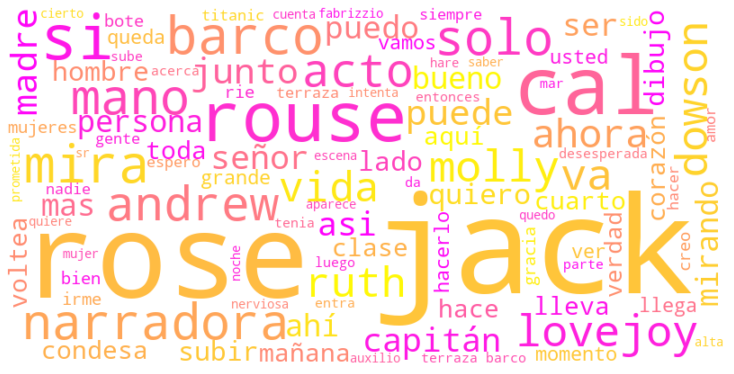

In [115]:
wordcloud = WordCloud(width=800, height=400,
                      max_font_size=150, max_words=100,
                      background_color="white", colormap="spring",
                      stopwords=stopwords).generate(cadena) # https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# El corazón de mar

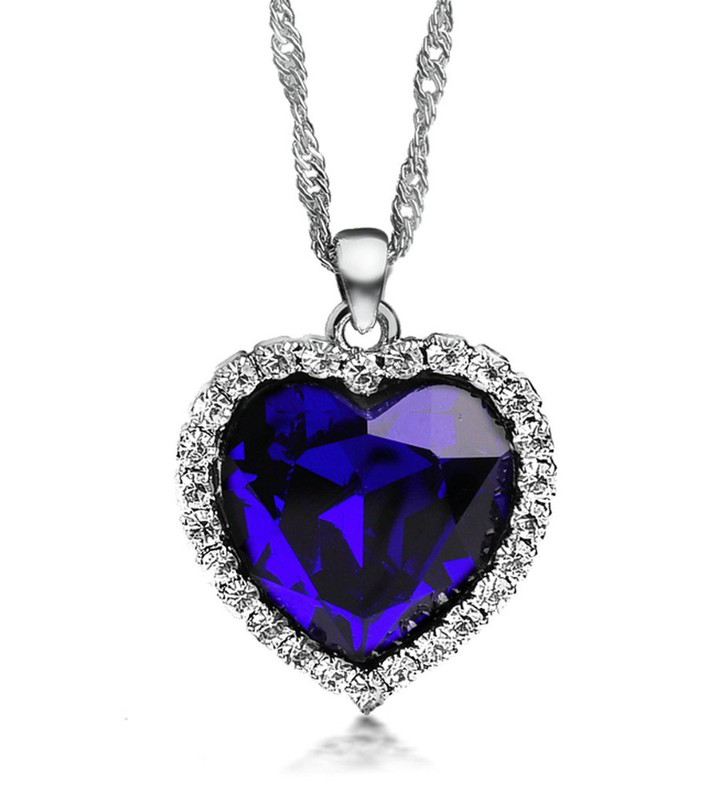

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [116]:
img = PIL.Image.open("corazon.jpg")
display(img)
mask = np.array(img)
mask


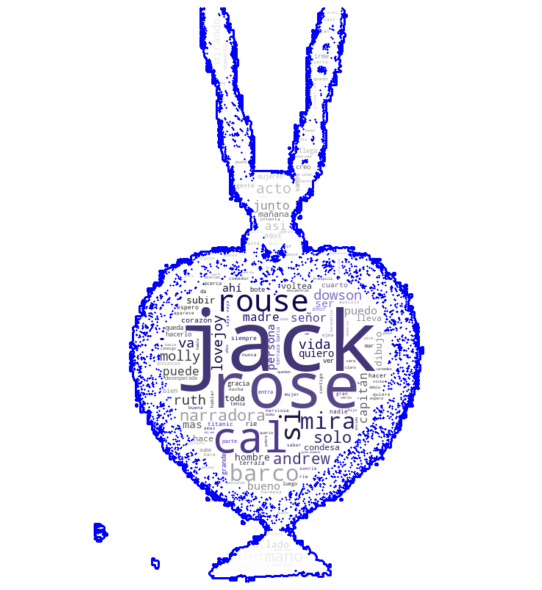

In [117]:
wordcloud = WordCloud(width=800, height=800,
                      max_font_size=200, max_words=200,
                      background_color="white", colormap="spring",
                      stopwords=stopwords, collocations=True,
                      mask=mask, contour_width=3, contour_color='blue').generate(cadena) # https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

image_colors=ImageColorGenerator(mask)
wordcloud.to_file("colgante-titanic-corazon-del-mar.jpg")

plt.figure(figsize=(10,8))
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()